In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import pymc3 as pm

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [11]:
df = pd.read_csv("top_30_guernsey.csv", index_col=0)

In [3]:
data = df.loc["Da Nello"].to_list()

In [5]:
samples = 10_000
results = []

for idx, data in df.iterrows():
    N = sum(data)
    with pm.Model() as model:
        uniforms = [pm.Uniform(f"uniform_{i}", 0, 1) for i in range(5)]
        observations = pm.Multinomial("obs", n=N, p=uniforms, observed=data)
        trace = pm.sample(samples, step=pm.Metropolis())
    burned_trace = trace[int(samples / 4) :]

    trace_df = pm.trace_to_dataframe(burned_trace)
    # trace_df["expected_mean"] = np.nan

    results.append(
        trace_df.apply(
            lambda x: ((x / x.sum()).values * np.array([5, 4, 3, 2, 1])).sum(), axis=1
        )
    )

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [uniform_4]
>Metropolis: [uniform_3]
>Metropolis: [uniform_2]
>Metropolis: [uniform_1]
>Metropolis: [uniform_0]
Sampling 4 chains, 0 divergences: 100%|██████████| 42000/42000 [00:06<00:00, 6139.25draws/s]
The number of effective samples is smaller than 10% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [uniform_4]
>Metropolis: [uniform_3]
>Metropolis: [uniform_2]
>Metropolis: [uniform_1]
>Metropolis: [uniform_0]
Sampling 4 chains, 0 divergences: 100%|██████████| 42000/42000 [00:07<00:00, 5630.84draws/s]
The estimated number of effective samples is smaller than 200 for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [uniform_4]
>Metropolis: [uniform_3]
>Metropolis: [uniform_2]
>Metropolis: [uniform_1]
>Metropolis: [uniform_0]
Sampling 4 chains, 0 divergences: 100%|██████████| 42000/42000 [00:07<00:00, 5274.84draws/s]
The number of effectiv

Sampling 4 chains, 0 divergences: 100%|██████████| 42000/42000 [00:06<00:00, 6164.91draws/s]
The number of effective samples is smaller than 10% for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [uniform_4]
>Metropolis: [uniform_3]
>Metropolis: [uniform_2]
>Metropolis: [uniform_1]
>Metropolis: [uniform_0]
Sampling 4 chains, 0 divergences: 100%|██████████| 42000/42000 [00:06<00:00, 6046.90draws/s]
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [uniform_4]
>Metropolis: [uniform_3]
>Metropolis: [uniform_2]
>Metropolis: [uniform_1]
>Metropolis: [uniform_0]
Sampling 4 chains, 0 divergences: 100%|██████████| 42000/42000 [00:07<00:00, 5772.55draws/s]
The number of effective samples is smaller than 10% for some parameters.
Multiprocess sampling 

In [10]:
results_df = pd.concat(results, axis=1)

In [13]:
results_df.columns

RangeIndex(start=0, stop=30, step=1)

In [17]:
results_df.columns = df.index.tolist()

In [19]:
# results_df.to_pickle("results_df.pkl")

In [21]:
results_df.columns.tolist()

['Fat Rascal',
 'Le Nautique',
 'The Conservatory at Moores Hotel',
 'La Reunion',
 'Village East',
 'The Old Quarter Restaurant',
 'China Red',
 'The Wellington Boot Restaurant',
 'Copenhagen Bar & Grill',
 'Red Grill House and Cocktail Bar',
 'La Piazza',
 'Cobo Tearoom',
 'La perla',
 'Pier 17',
 'Le Gouffre Cafe and Restaurant',
 'Da Nello',
 'Old Government House Brasserie',
 'Gusto Italian',
 'The Lobster & Grill',
 'The Captains',
 'The Hook',
 "The Crow's Nest",
 'The Pickled Pig',
 'The Rockmount Restaurant and Bar',
 'The Boathouse',
 'Christies',
 'Le Petit Bistro',
 'Le Petit Cafe',
 "Crabby Jack's",
 'The Queens Inn']

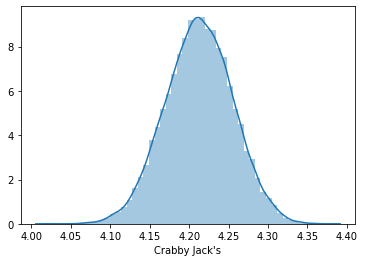

In [22]:
sns.distplot(results_df["Crabby Jack's"])

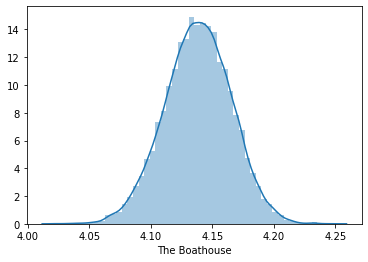

In [23]:
sns.distplot(results_df["The Boathouse"])

In [ ]:
import matplotlib.pyplot as plt

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)

In [ ]:
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

In [61]:
results_df[results_df.columns[20:]]

,The Hook,The Crow's Nest,The Pickled Pig,The Rockmount Restaurant and Bar,The Boathouse,Christies,Le Petit Bistro,Le Petit Cafe,Crabby Jack's,The Queens Inn
0,4.391037,4.239325,4.301587,4.239305,4.156799,4.343854,4.352760,4.277207,4.234874,4.398662
1,4.374292,4.089529,4.246088,4.213947,4.156799,4.343854,4.352760,4.289693,4.234874,4.476242
2,4.396682,4.101348,4.353174,4.219314,4.074672,4.307856,4.379962,4.400479,4.235950,4.475795
3,4.436914,4.157112,4.356678,4.233936,4.072119,4.310883,4.379962,4.368606,4.218793,4.386184
4,4.449485,4.144805,4.357285,4.221829,4.074247,4.271550,4.365076,4.330649,4.183373,4.233754
...,...,...,...,...,...,...,...,...,...,...
29995,4.400575,4.072848,4.312934,4.300845,4.144205,4.320550,4.437570,4.403463,4.290783,4.251276
29996,4.371209,4.062717,4.275305,4.266464,4.131716,4.288385,4.423913,4.346897,4.216744,4.359097
29997,4.349610,4.202904,4.275305,4.276406,4.148057,4.295856,4.345591,4.313159,4.210188,4.331080
29998,4.405172,4.175636,4.279936,4.239197,4.140085,4.292673,4.421129,4.312107,4.212234,4.260026


In [76]:
results_unstacked_df = (
    results_df.unstack()
    .reset_index()
    .drop(axis=1, labels="level_1")
    .rename(columns={"level_0": "name", 0: "value"})
)

In [77]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-0.25, light=0.7)
g = sns.FacetGrid(results_unstacked_df, row="name", hue="name", aspect=15, height=9, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "value", clip_on=False, shade=True, alpha=1, lw=1.5, bw=0.2)
g.map(sns.kdeplot, "value", clip_on=False, color="w", lw=2, bw=0.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(
        0,
        0.2,
        label,
        fontweight="bold",
        color=color,
        ha="left",
        va="center",
        transform=ax.transAxes,
        fontsize=50
    )


g.map(label, "value")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-0.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [ ]:
sns.distplot(trace_df["expected_mean"])

In [ ]:
trace_df["expected_mean"].mean()

In [ ]:
(np.array(data) * np.array([5, 4, 3, 2, 1])).sum() / np.array(data).sum()

In [ ]:
pm.plots.traceplot(burned_trace)